# CS634 - DATA MINING
## Final Term Project
### Binary classification of Gallstone Disease Using Random Forest, SVM, and LSTM

**Student:** Tanushri Vijayakumar

**Instructor:** Dr. Yasser Abdullah

**Semester:** Fall 2025

## Overview

The goal of this project is to develop and evaluate binary classification models for predicting gallstone disease based on patient medical attributes. 
In this project, I implemented three different machine learning approaches:
1. **Random Forest:**
2. **Support Vector Machine(SVM)**
3. **Long Short-Term Memory Network(LSTM)**

Each model was trained and evaluated using 10-fold stratified cross-validation, and performance was compared using a complete set of manual evaluation metrics such as Precision, recall, F1-score, Balanced Accuracy, TSS, HSS, Brier score, Brier Skill Score, ROC, and AUC.
All metric computations were implemented manually except the confusion matrix, ROC, AUC, BS, and BSS, as permitted by the instructor.

## 1. Importing necessary packages and libraries

Importing all the Python libraries that will be used throughout the project.
`numpy` and `pandas` handle numerical operations and tabular data manipulation, while `matplotlib.pyplot` and 'seaborn' are used to create visualizations for exploratory data analysis and result plots.

From `scikit-learn`, import tools for:
- splitting data and setting up cross-validation (`train_test_split`, `StratifiedKFold`, `GridSearchCV`)
- preprocessing (`StandardScaler`)
- building traditional ML models (`RandomForestClassifier`, `SVC`)
- computing evaluation metrics (`confusion_metrics`, `roc_curve`, `roc_auc_score`, `brier_score_loss`)

From `keras` (TensorFlow), import `Sequential`, `LSTM`, `Dense`, and  `Adam` to implement and train the deep learning model.

In [1]:
# Importing the packages and libraries - required for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, brier_score_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

print("All libraries imported successfully.")


All libraries imported successfully.


In [2]:
# To find the library versions
import sys, sklearn, tensorflow as tf
print(sys.version)
print("sklearn:", sklearn.__version__)
print("tf:", tf.__version__)


3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
sklearn: 1.0.2
tf: 2.15.0


## 2. Loading Data

Loading the gallstone dataset from the file `gallstone.csv` into a Pandas DataFrame called `df` using `pd.read_csv()`

The dataset used in this project is the **Gallstone Dataset**, which contains patient-level medical attributes along with a binary `target column`- `Gallstone Status`(1 = gallstones present, 0 = no gallstones).

`df.describe()` to compute basic descriptive statistics (count, mean, standard deviation, min, max, and quartiles) for the numeric columns.

In [3]:
# Loading data and describing it
df = pd.read_csv("gallstone.csv")
df.describe()


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


In [4]:
print(df.shape)
df.head()

(319, 39)


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [5]:
print("\nColumn names:", list(df.columns))
print("\nData types:")
print(df.dtypes)
print("Missing values per column:\n", df.isna().sum())



Column names: ['Gallstone Status', 'Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']

Data types:
Gallstone Status  

## 3. Data Preprocessing and Visualisation

The preprocessing steps performed include:
- **1. Handling Missing Values**  
If there are missing values - replace it by using median imputation
- **2. Feature–Label Separation**  
The input features (X) were separated from the target column (`Gallstone Status`), converted to integer labels.
- **3. Data Imbalance Analysis**  
Class distribution was plotted and imbalance ratio computed. This helps assess whether stratified sampling or class weights are necessary.
- **4. Normalization**  
All feature values were standardized using `StandardScaler`. This improves the performance of distance-based and gradient-based algorithms such as SVM and LSTM.
- **5. Train-Test Split**  
A stratified 90/10 split ensures the minority/majority ratios remain consistent in both sets.

In [6]:
# detect numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# simple missing-value handling by filling numeric NA with median
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())


In [7]:
# Separating dataset into features and output label
TARGET_COL = "Gallstone Status"
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL].astype(int)


Checking for Data Imbalance:
Number of majority class samples: 161
Number of minority class samples: 158
Imbalance ratio (minority/majority): 98.14%


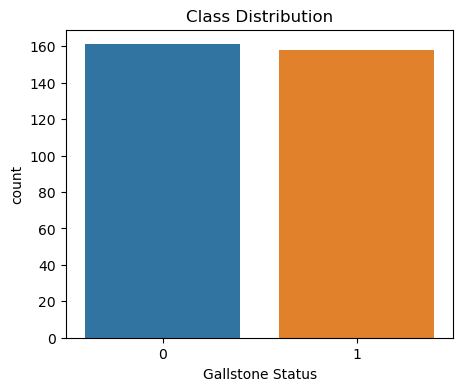

In [8]:
# Check class imbalance
print("Checking for Data Imbalance:")
counts = y.value_counts()
majority = counts.max()
minority = counts.min()
imbalance_ratio = minority / majority * 100

print(f"Number of majority class samples: {majority}")
print(f"Number of minority class samples: {minority}")
print(f"Imbalance ratio (minority/majority): {imbalance_ratio:.2f}%")

# Visualizing the distribution of the target variable
plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()


### Data Visualisation

- **Countplot** to visualize target distribution  
- **Correlation heatmap** to inspect pairwise feature relationships  
- **Feature histograms** to examine attribute distributions  
- **Pairplot** (sampled) for bi-variate visual patterns


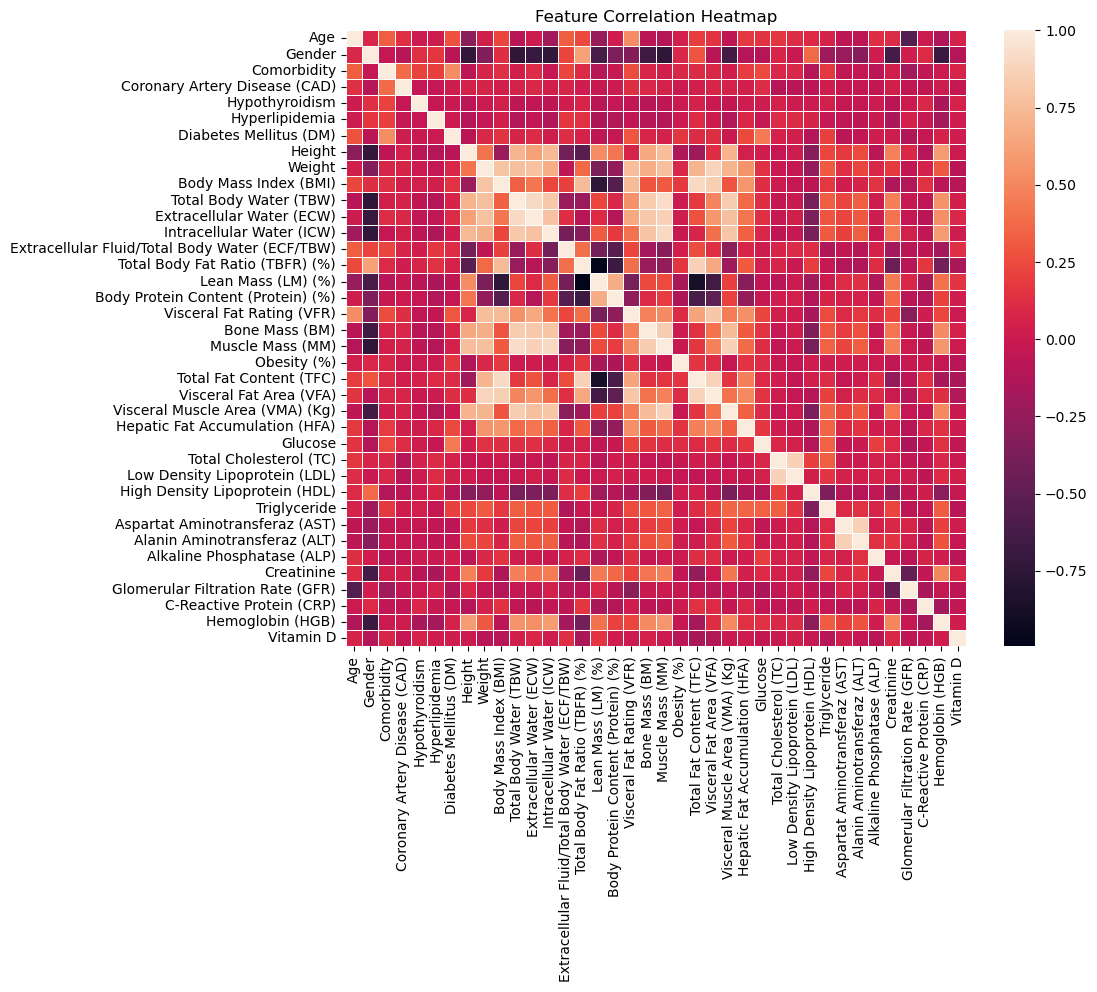

In [9]:
# Checking for Correlation between attributes
plt.figure(figsize=(10,8))
corr = X.corr()
sns.heatmap(corr, annot=False, linewidths = 0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


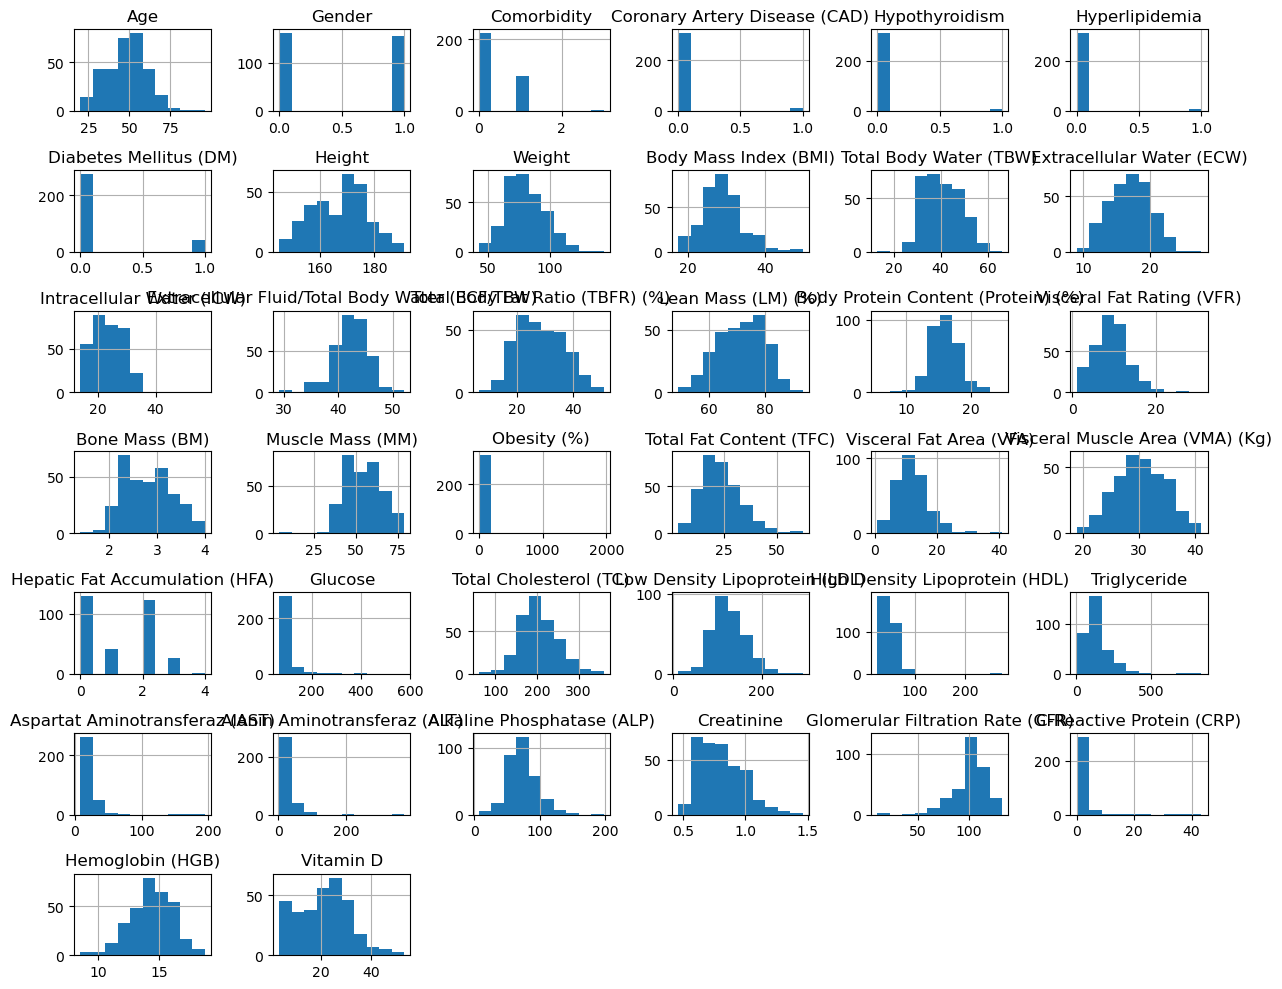

In [10]:
# Visualize the distribution of values for each attribute (histograms)
X.hist(figsize=(12,10))
plt.tight_layout()
plt.show()


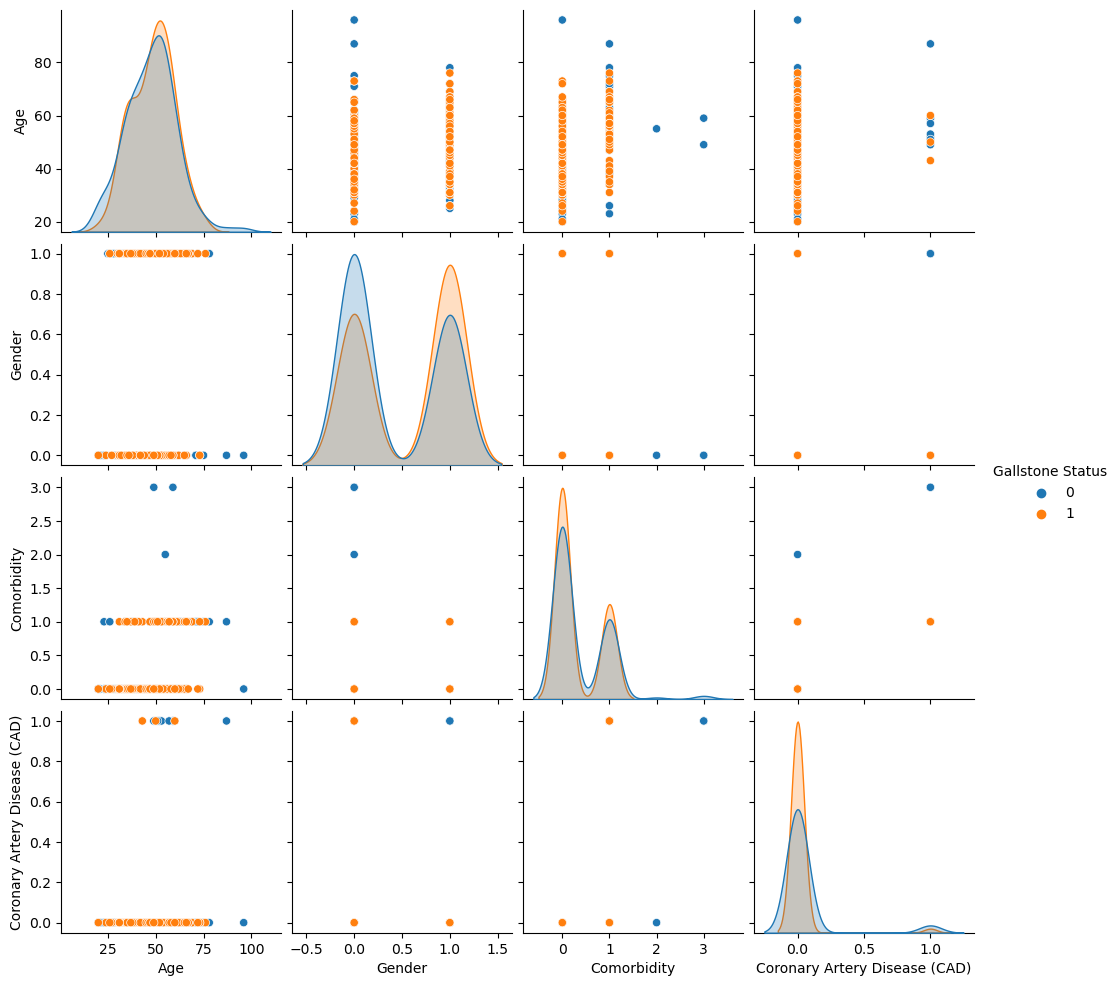

In [11]:
# Generate a pairplot to visualize multiple pairwise bivariate distributions
sampled_cols = list(X.columns[:4]) + [TARGET_COL]
sns.pairplot(df[sampled_cols], hue=TARGET_COL)
plt.show()


In [12]:
# Train Test Data Split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

# Normalize the training dataset
scaler = StandardScaler()
X_train_all_std = scaler.fit_transform(X_train_all)
X_test_all_std = scaler.transform(X_test_all)
pd.DataFrame(X_train_all_std, columns=X_train_all.columns).describe()


,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,...,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02
mean,-2.630494e-17,7.736746e-18,-9.051993e-17,2.572468e-17,1.831675e-16,-1.562823e-16,-5.841243e-17,6.282238e-16,8.355685e-16,5.876058e-16,...,-1.036724e-16,4.704909e-17,5.350934e-17,-1.276563e-17,4.003766e-17,8.007532e-17,2.529916e-16,9.922377e-17,2.555060e-16,-6.556892e-17
std,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,...,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00
min,-2.306821e+00,-9.759001e-01,-6.683448e-01,-1.900029e-01,-1.799280e-01,-1.461243e-01,-4.024218e-01,-2.180418e+00,-2.413882e+00,-2.151825e+00,...,-1.347642e+00,-1.492541e+00,-7.493612e-01,-8.446147e-01,-2.792016e+00,-1.963613e+00,-5.163630e+00,-3.646315e-01,-3.299010e+00,-1.798366e+00
25%,-7.978809e-01,-9.759001e-01,-6.683448e-01,-1.900029e-01,-1.799280e-01,-1.461243e-01,-4.024218e-01,-8.130199e-01,-7.239177e-01,-6.946702e-01,...,-5.236916e-01,-6.264359e-01,-4.038726e-01,-4.583197e-01,-6.153394e-01,-8.333343e-01,-3.852117e-01,-3.646315e-01,-6.445167e-01,-8.160430e-01
50%,5.854442e-02,-9.759001e-01,-6.683448e-01,-1.900029e-01,-1.799280e-01,-1.461243e-01,-4.024218e-01,6.602171e-02,-1.226194e-01,-5.426454e-02,...,-1.941116e-01,-2.443773e-01,-2.311283e-01,-2.952173e-01,-8.701993e-02,-4.213930e-02,2.039005e-01,-3.252900e-01,-1.849821e-03,8.567875e-02
75%,6.294946e-01,1.024695e+00,1.329728e+00,-1.900029e-01,-1.799280e-01,-1.461243e-01,-4.024218e-01,7.497207e-01,7.002098e-01,5.490162e-01,...,3.551885e-01,2.650341e-01,1.143603e-01,1.168307e-01,5.469635e-01,6.925418e-01,5.921398e-01,-6.563647e-02,7.246432e-01,6.700348e-01
max,3.892067e+00,1.024695e+00,5.325873e+00,5.263079e+00,5.557777e+00,6.843488e+00,2.484955e+00,2.312461e+00,3.953550e+00,3.843857e+00,...,1.227500e+01,7.386181e+00,9.960785e+00,1.182586e+01,5.238441e+00,3.687780e+00,1.813757e+00,8.172462e+00,2.345281e+00,3.198886e+00


## 4. Metric computation 

From the confusion matix, we get TP, FN, FP, and TN.

P = TP+FN

N = TN + FP

TOTAL = P+N

We compute:
- **TPR (Recall):** TP/(TP+FN)
- **TNR (Specificity):** TN/(TN+FP)
- **FPR:** FP / (FP + TN)  
- **FNR:** FN / (FN + TP)  
- **Precision:** TP / (TP + FP)  
- **F1-Score:** 2 * Precision * TPR / (Precision + TPR)
- **Accuracy:** (TP + TN) / Total  
- **Balanced Accuracy:** (TPR + TNR) / 2  
- **Error Rate:** 1 - Accuracy  
- **TSS:** TPR - FPR  
- **HSS:** Heidke Skill Score  

ROC, AUC, Brier Score (BS), and Brier Skill Score (BSS) are computed using Python packages.

In [13]:
# Metric Functions (manual except CM, ROC/AUC/BS/BSS)
def manual_metrics_from_cm(cm):
    TP, FN = cm[0][0], cm[0][1]
    FP, TN = cm[1][0], cm[1][1]
    P = TP + FN
    N = TN + FP
    total = P + N

    tpr = TP/P   # recall or sensitivity
    tnr = TN/N   # specificity
    fpr = FP/N
    fnr = FN/P
    
    precision = TP/(TP + FP)
    
    accuracy = (TP + TN)/(total)
    error_rate = 1 - accuracy
    
    f1 = 2 * precision * tpr / (precision + tpr)
    bacc = (tpr + tnr) / 2
    tss = tpr - fpr
    hss = (2 * (TP * TN - FP * FN)) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))
    
    metrics = [TP, TN, FP, FN, tpr, tnr, fpr, fnr, precision, f1, accuracy, error_rate, bacc, tss, hss]
    
    return {
        "TP": TP, "TN": TN, "FP": FP, "FN": FN,
        "P": P, "N": N,
        "TPR": tpr, "TNR": tnr, "FPR": fpr, "FNR": fnr,
        "Precision": precision, "Recall": tpr, "F1": f1,
        "Accuracy": accuracy, "Error_rate": error_rate,
        "Balanced_Accuracy": bacc,
        "TSS": tss, "HSS": hss
    }

def brier_and_bss(y_true, y_prob):
    bs = brier_score_loss(y_true, y_prob)
    p_ref = np.mean(y_true)
    bs_ref = np.mean((p_ref - y_true)**2)
    bss = 1 - bs / (bs_ref + 1e-12)
    return bs, bss
   

## 5. Model Selection and Parameter Tuning

These are the 3 models used in this project:

### 1. Random Forest:
- Hyperparameters tuned: n_estimators, min_samples_split
- GridSearchCV (5-fold)

### 2. Support Vector Machine (SVM)
- Kernel: Linear
- Hyperparameters tuned: C
- GridSearchCV (5-fold)

### 3. LSTM (Deep Learning Model)
- Sequential Keras model  
- Input reshaped to (samples, timesteps, 1)  
- Tuned manually: hidden units, activation, optimizer

These tuned models are used during 10-fold cross-validation.

### 5.1 Hyperparameter Tuning for Random Forest and SVM

To ensure fair comparison between models, the classical ML algorithms—Random Forest and SVM are tuned using `GridSearchCV`.  
The grid search performs an internal 5-fold cross-validation on the training data only. This procedure helps identify the optimal hyperparameters before performing the final 10-fold evaluation.

**SVM Tuning**:
The SVM model uses:
- A linear kernel  
- A grid of `C` vaklues

GridSearchCV evaluates each `C` value using 5-fold CV and returns the best-performing configuration. This tuned SVM model is then used during the full 10-fold stratified cross-validation loop.

In [14]:
# Parameter tuning for Random Forest
rf_param_grid = {
    "n_estimators": [50, 100, 150],
    "min_samples_split": [2, 4, 6, 10]
}
rf_base = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_base, rf_param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train_all_std, y_train_all)
best_rf_params = rf_grid.best_params_
print("Best RF params:", best_rf_params)

Best RF params: {'min_samples_split': 6, 'n_estimators': 150}


In [15]:
# Parameter Tuning for SVM
svm_param_grid = {
    "C": [0.1, 1, 3, 10],
    "kernel": ["linear"]
}
svm_base = SVC(probability=True, random_state=42)
svm_grid = GridSearchCV(svm_base, svm_param_grid, cv=5, n_jobs=-1)
svm_grid.fit(X_train_all_std, y_train_all)
best_svm_params = svm_grid.best_params_
print("Best SVM params:", best_svm_params)

Best SVM params: {'C': 10, 'kernel': 'linear'}


### 5.2. LSTM Model Construction

LSTM is included as the deep learning component.
Although the dataset is tabular (not sequential), a simple LSTM architecture is implemented for comparison.

The function `build_lstm()` creates a compact LSTM model:
- One LSTM layer with 64 hidden units  
- ReLU activation  
- A final sigmoid output neuron  
- Binary cross-entropy loss  
- Adam optimizer (learning rate = 0.001)

In [16]:
def build_lstm(input_dim):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(input_dim, 1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    return model


## 6. 10-Fold Stratified Cross-Validation for RF, SVM, and LSTM

Using `StratifiedKFold(n_splits=10)`, the dataset is divided into 10 folds while preserving class distribution.  

For each fold:

1. The training and validation subsets are created  
2. Models (RF, SVM, LSTM) are trained separately  
3. Predictions are generated  
4. A confusion matrix is created  
5. All required metrics (TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, Recall, F1, Accuracy, Balanced Accuracy, Error Rate, TSS, HSS) are computed manually
6. Allowed metrics (Brier Score, Brier Skill Score, ROC, AUC) are computed using sklearn  
7. Each model’s metrics are stored in a list  
8. A comparison table is printed for that fold  

This process results in 10 performance summaries for each model and allows averaging across all folds.

In [17]:
# 10-Fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metric_columns = [
    "TP","TN","FP","FN","P","N",
    "TPR","TNR","FPR","FNR",
    "Precision","Recall","F1_measure",
    "Accuracy","Error_rate","Balanced_Accuracy",
    "TSS","HSS","Brier_score","BSS","AUC"
]

rf_metrics_list = []
svm_metrics_list = []
lstm_metrics_list = []

for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X_train_all_std, y_train_all), start=1):
    X_train, X_test = X_train_all_std[train_idx], X_train_all_std[test_idx]
    y_train, y_test = y_train_all.iloc[train_idx], y_train_all.iloc[test_idx]

    # 1. RANDOM FOREST
    rf = RandomForestClassifier(
        n_estimators=best_rf_params["n_estimators"],
        min_samples_split=best_rf_params["min_samples_split"],
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    y_prob_rf = rf.predict_proba(X_test)[:, 1]

    cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[1, 0])
    m_rf = manual_metrics_from_cm(cm_rf)
    bs_rf, bss_rf = brier_and_bss(y_test.values, y_prob_rf)
    auc_rf = roc_auc_score(y_test, y_prob_rf)

    m_rf["Brier_score"] = bs_rf
    m_rf["BSS"] = bss_rf
    m_rf["AUC"] = auc_rf
    rf_metrics_list.append(m_rf)

    # 2. SUPPORT VECTOR MACHINE
    svm = SVC(
        C=best_svm_params["C"],
        kernel=best_svm_params["kernel"],
        probability=True,
        random_state=42
    )
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    y_prob_svm = svm.predict_proba(X_test)[:, 1]

    cm_svm = confusion_matrix(y_test, y_pred_svm, labels=[1, 0])
    m_svm = manual_metrics_from_cm(cm_svm)
    bs_svm, bss_svm = brier_and_bss(y_test.values, y_prob_svm)
    auc_svm = roc_auc_score(y_test, y_prob_svm)

    m_svm["Brier_score"] = bs_svm
    m_svm["BSS"] = bss_svm
    m_svm["AUC"] = auc_svm
    svm_metrics_list.append(m_svm)

    # 3. LSTM
    X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_lstm  = X_test.reshape((X_test.shape[0],  X_test.shape[1],  1))

    lstm = build_lstm(input_dim=X_train.shape[1])
    lstm.fit(
        X_train_lstm, y_train,
        epochs=30, batch_size=32, verbose=0,
        validation_data=(X_test_lstm, y_test)
    )

    y_prob_lstm = lstm.predict(X_test_lstm).ravel()
    y_pred_lstm = (y_prob_lstm >= 0.5).astype(int)

    cm_lstm = confusion_matrix(y_test, y_pred_lstm, labels=[1, 0])
    m_lstm = manual_metrics_from_cm(cm_lstm)
    bs_lstm, bss_lstm = brier_and_bss(y_test.values, y_prob_lstm)
    auc_lstm = roc_auc_score(y_test, y_prob_lstm)

    m_lstm["Brier_score"] = bs_lstm
    m_lstm["BSS"] = bss_lstm
    m_lstm["AUC"] = auc_lstm
    lstm_metrics_list.append(m_lstm)

    # PRINT TABLE FOR THIS ITERATION
    metrics_all_df = pd.DataFrame(
        [m_rf, m_svm, m_lstm],
        columns=metric_columns,
        index=["RF", "SVM", "LSTM"]
    )

    print(f"\nIteration {fold_idx}:")
    print(f"Metrics for all Algorithms in Iteration {fold_idx}\n")
    print(metrics_all_df.round(2).T)
    print("\n")

print("10-Fold Cross-Validation Complete")





1/1 [==============================] - 1s 588ms/step

Iteration 1:
Metrics for all Algorithms in Iteration 1

                      RF    SVM   LSTM
TP                 11.00  13.00   9.00
TN                  9.00  12.00   7.00
FP                  6.00   3.00   8.00
FN                  3.00   1.00   5.00
P                  14.00  14.00  14.00
N                  15.00  15.00  15.00
TPR                 0.79   0.93   0.64
TNR                 0.60   0.80   0.47
FPR                 0.40   0.20   0.53
FNR                 0.21   0.07   0.36
Precision           0.65   0.81   0.53
Recall              0.79   0.93   0.64
F1_measure           NaN    NaN    NaN
Accuracy            0.69   0.86   0.55
Error_rate          0.31   0.14   0.45
Balanced_Accuracy   0.69   0.86   0.55
TSS                 0.39   0.73   0.11
HSS                 0.38   0.73   0.11
Brier_score         0.17   0.15   0.25
BSS                 0.30   0.39   0.01
AUC                 0.85   0.97   0.56


1/1 [======================

## 7. Results & Metrics

The following outputs are generated:

- **Per-fold metrics table** for RF, SVM, and LSTM  
- **DataFrames** storing 10 iterations of results  
- **Average metrics table** comparing the three models  

Metrics include:
Accuracy, Precision, Recall, F1, TPR, TNR, FPR, FNR, Balanced Accuracy, TSS, HSS, Brier Score, Brier Skill Score, and AUC.

This section provides numerical insight into how each algorithm behaves on different subsets of the data.


In [18]:
# Create DataFrames for all folds and compute averages
iter_index = [f"iter{i}" for i in range(1, 11)]

rf_df   = pd.DataFrame(rf_metrics_list,  index=iter_index, columns=metric_columns)
svm_df  = pd.DataFrame(svm_metrics_list, index=iter_index, columns=metric_columns)
lstm_df = pd.DataFrame(lstm_metrics_list,index=iter_index, columns=metric_columns)

print("\nRandom Forest Metrics per Fold")
display(rf_df.T.round(2))

print("\nSVM Metrics per Fold")
display(svm_df.T.round(2))

print("\nLSTM Metrics per Fold")
display(lstm_df.T.round(2))

# Average performance across 10 folds
rf_avg   = rf_df.mean().to_frame(name="RF")
svm_avg  = svm_df.mean().to_frame(name="SVM")
lstm_avg = lstm_df.mean().to_frame(name="LSTM")

avg_all = pd.concat([rf_avg, svm_avg, lstm_avg], axis=1)

print("\n Average Performance Across 10 Folds: ")
display(avg_all.round(3))



Random Forest Metrics per Fold


,iter1,iter2,iter3,iter4,iter5,iter6,iter7,iter8,iter9,iter10
TP,11.00,9.00,12.00,9.00,9.00,11.00,13.00,12.00,11.00,11.00
TN,9.00,11.00,13.00,13.00,10.00,11.00,11.00,13.00,13.00,11.00
FP,6.00,4.00,2.00,2.00,5.00,3.00,3.00,1.00,1.00,3.00
FN,3.00,5.00,2.00,5.00,5.00,4.00,2.00,2.00,3.00,3.00
P,14.00,14.00,14.00,14.00,14.00,15.00,15.00,14.00,14.00,14.00
N,15.00,15.00,15.00,15.00,15.00,14.00,14.00,14.00,14.00,14.00
TPR,0.79,0.64,0.86,0.64,0.64,0.73,0.87,0.86,0.79,0.79
TNR,0.60,0.73,0.87,0.87,0.67,0.79,0.79,0.93,0.93,0.79
FPR,0.40,0.27,0.13,0.13,0.33,0.21,0.21,0.07,0.07,0.21
FNR,0.21,0.36,0.14,0.36,0.36,0.27,0.13,0.14,0.21,0.21



SVM Metrics per Fold


,iter1,iter2,iter3,iter4,iter5,iter6,iter7,iter8,iter9,iter10
TP,13.00,10.00,11.00,8.00,10.00,13.00,11.00,11.00,10.00,11.00
TN,12.00,12.00,12.00,12.00,12.00,12.00,11.00,14.00,12.00,10.00
FP,3.00,3.00,3.00,3.00,3.00,2.00,3.00,0.00,2.00,4.00
FN,1.00,4.00,3.00,6.00,4.00,2.00,4.00,3.00,4.00,3.00
P,14.00,14.00,14.00,14.00,14.00,15.00,15.00,14.00,14.00,14.00
N,15.00,15.00,15.00,15.00,15.00,14.00,14.00,14.00,14.00,14.00
TPR,0.93,0.71,0.79,0.57,0.71,0.87,0.73,0.79,0.71,0.79
TNR,0.80,0.80,0.80,0.80,0.80,0.86,0.79,1.00,0.86,0.71
FPR,0.20,0.20,0.20,0.20,0.20,0.14,0.21,0.00,0.14,0.29
FNR,0.07,0.29,0.21,0.43,0.29,0.13,0.27,0.21,0.29,0.21



LSTM Metrics per Fold


,iter1,iter2,iter3,iter4,iter5,iter6,iter7,iter8,iter9,iter10
TP,9.00,6.00,9.00,3.00,7.00,8.00,10.00,11.00,11.00,8.00
TN,7.00,12.00,12.00,12.00,11.00,11.00,11.00,12.00,9.00,8.00
FP,8.00,3.00,3.00,3.00,4.00,3.00,3.00,2.00,5.00,6.00
FN,5.00,8.00,5.00,11.00,7.00,7.00,5.00,3.00,3.00,6.00
P,14.00,14.00,14.00,14.00,14.00,15.00,15.00,14.00,14.00,14.00
N,15.00,15.00,15.00,15.00,15.00,14.00,14.00,14.00,14.00,14.00
TPR,0.64,0.43,0.64,0.21,0.50,0.53,0.67,0.79,0.79,0.57
TNR,0.47,0.80,0.80,0.80,0.73,0.79,0.79,0.86,0.64,0.57
FPR,0.53,0.20,0.20,0.20,0.27,0.21,0.21,0.14,0.36,0.43
FNR,0.36,0.57,0.36,0.79,0.50,0.47,0.33,0.21,0.21,0.43



 Average Performance Across 10 Folds: 


,RF,SVM,LSTM
TP,10.800,10.800,8.200
TN,11.500,11.900,10.500
FP,3.000,2.600,4.000
FN,3.400,3.400,6.000
P,14.200,14.200,14.200
N,14.500,14.500,14.500
TPR,0.760,0.760,0.577
TNR,0.795,0.821,0.724
FPR,0.205,0.179,0.276
FNR,0.240,0.240,0.423


## 8. ROC Curve Analysis

ROC curves were plotted for:

- **Random Forest**
- **Support Vector Machine**
- **LSTM**
- **Combined comparison plot**

AUC values quantify how well each classifier separates the two classes.  
Higher AUC indicates stronger ranking ability and better discrimination.


1/1 [==============================] - 0s 467ms/step


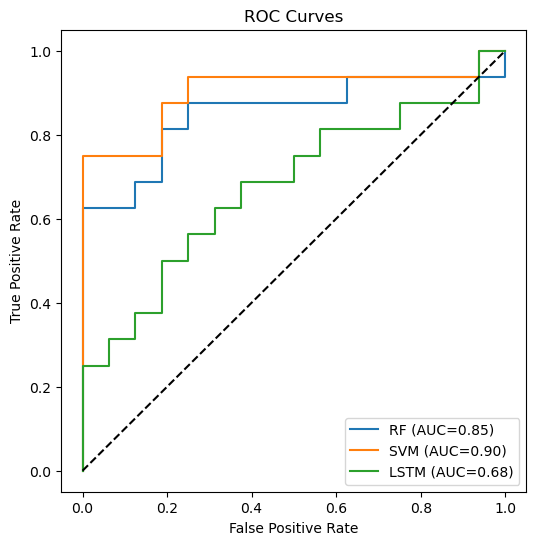

In [19]:
# 10. Evaluate ROC & AUC on the Hold-Out Test Set

rf_final = RandomForestClassifier(
    n_estimators=best_rf_params["n_estimators"],
    min_samples_split=best_rf_params["min_samples_split"],
    random_state=42
).fit(X_train_all_std, y_train_all)

svm_final = SVC(
    C=best_svm_params["C"],
    kernel=best_svm_params["kernel"],
    probability=True,
    random_state=42
).fit(X_train_all_std, y_train_all)

input_dim = X_train_all_std.shape[1]
lstm_final = build_lstm(input_dim)
X_train_lstm = X_train_all_std.reshape((X_train_all_std.shape[0], X_train_all_std.shape[1], 1))
X_test_lstm  = X_test_all_std.reshape((X_test_all_std.shape[0],  X_test_all_std.shape[1],  1))
lstm_final.fit(X_train_lstm, y_train_all, epochs=50, batch_size=32, verbose=0,
               validation_data=(X_test_lstm, y_test_all))

# Predictions for ROC
rf_probs  = rf_final.predict_proba(X_test_all_std)[:, 1]
svm_probs = svm_final.predict_proba(X_test_all_std)[:, 1]
lstm_probs= lstm_final.predict(X_test_lstm).ravel()

fpr_rf,  tpr_rf,  _ = roc_curve(y_test_all, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test_all, svm_probs)
fpr_lstm,tpr_lstm,_ = roc_curve(y_test_all, lstm_probs)

auc_rf   = roc_auc_score(y_test_all, rf_probs)
auc_svm  = roc_auc_score(y_test_all, svm_probs)
auc_lstm = roc_auc_score(y_test_all, lstm_probs)

plt.figure(figsize=(6,6))
plt.plot(fpr_rf,  tpr_rf,  label=f'RF (AUC={auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={auc_svm:.2f})')
plt.plot(fpr_lstm,tpr_lstm,label=f'LSTM (AUC={auc_lstm:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


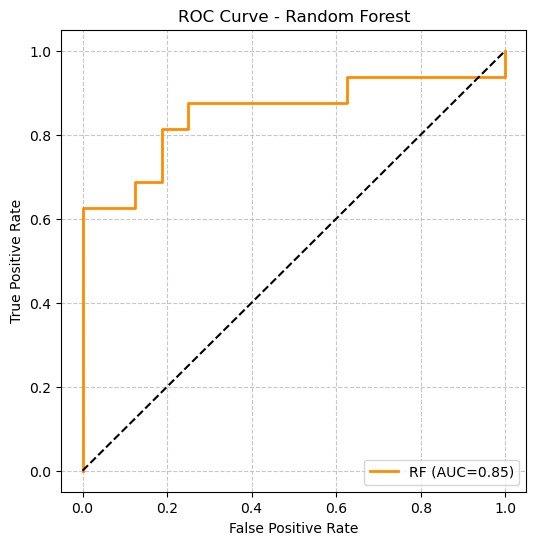

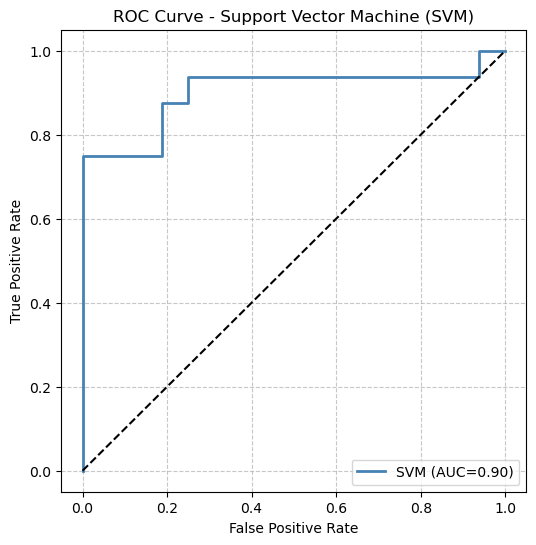

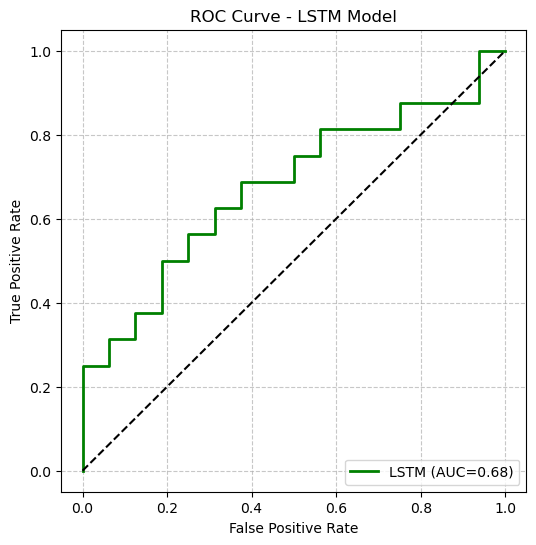

In [20]:
# Individual ROC Curves for Each Model

# Random Forest ROC
plt.figure(figsize=(6,6))
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC={auc_rf:.2f})', color='darkorange', linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# SVM ROC
plt.figure(figsize=(6,6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={auc_svm:.2f})', color='steelblue', linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve - Support Vector Machine (SVM)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# LSTM ROC
plt.figure(figsize=(6,6))
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC={auc_lstm:.2f})', color='green', linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve - LSTM Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## 9. Final Model Comparison and Best Model Selection

This summarizes the overall performance of all three models - Random Forest (RF), Support Vector Machine (SVM), and LSTM-based on the mean evaluation metrics across all 10 folds.

The table displayed below (`avg_all`) aggregates:

- **Confusion matrix metrics:** TP, TN, FP, FN  
- **Rate-based metrics:** TPR, TNR, FPR, FNR  
- **Classical metrics:** Precision, Recall, F1-measure  
- **Performance metrics:** Accuracy, Error Rate, Balanced Accuracy  
- **Skill scores:** TSS (True Skill Statistic), HSS (Heidke Skill Score)  
- **Probabilistic metrics:** Brier Score (BS), Brier Skill Score (BSS)  
- **Ranking metric:** AUC (Area Under the ROC Curve)  

By averaging results across all folds, we reduce variance and obtain a estimate of each model's true generalization ability.

### Identifying the Best Model
The model achieving the **highest mean Accuracy** is selected as the best-performing classifier.  
This is presented in the printed summary following the comparison table.

In [21]:
print("\nModel Comparison Summary (Mean Across 10 Folds)")
print(avg_all.round(3))

best_model = avg_all.loc["Accuracy"].idxmax()
print(f"\nBest Overall Model Based on Mean Accuracy: {best_model}")



Model Comparison Summary (Mean Across 10 Folds)
                       RF     SVM    LSTM
TP                 10.800  10.800   8.200
TN                 11.500  11.900  10.500
FP                  3.000   2.600   4.000
FN                  3.400   3.400   6.000
P                  14.200  14.200  14.200
N                  14.500  14.500  14.500
TPR                 0.760   0.760   0.577
TNR                 0.795   0.821   0.724
FPR                 0.205   0.179   0.276
FNR                 0.240   0.240   0.423
Precision           0.788   0.808   0.668
Recall              0.760   0.760   0.577
F1_measure            NaN     NaN     NaN
Accuracy            0.778   0.791   0.652
Error_rate          0.222   0.209   0.348
Balanced_Accuracy   0.777   0.791   0.651
TSS                 0.555   0.581   0.301
HSS                 0.555   0.581   0.302
Brier_score         0.166   0.178   0.229
BSS                 0.335   0.287   0.081
AUC                 0.848   0.861   0.685

Best Overall Model Based o